# Description
**This program predicts the closing price of Apple stocks using the past 60 days
with the use of a neural network model called LSTM**


# Data manipulation and visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data set shape: (2193, 6)


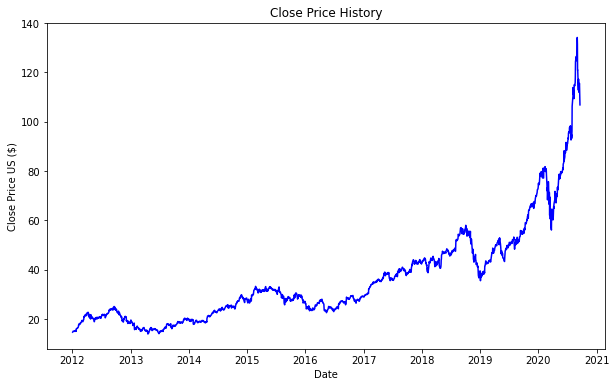

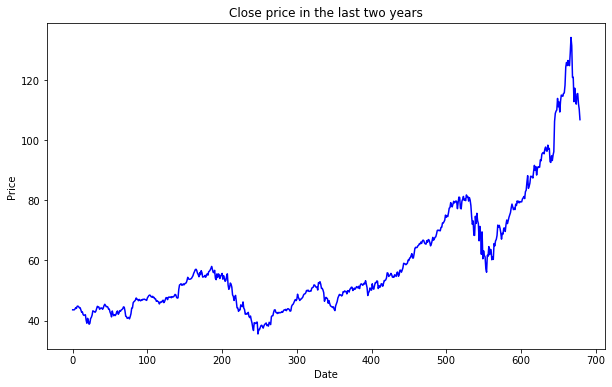

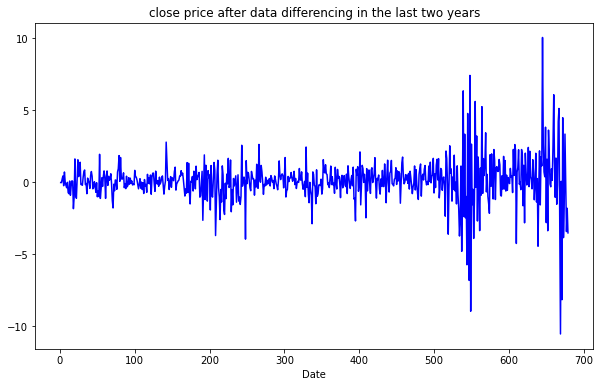

Training set shape: (544, 1)
Testing set shape: (195, 1)


In [116]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from utilities.data_manipulation import get_data
df, x_train, y_train, x_test, y_test, training_data_len, close_last_two_years_df, real_test_data = get_data()

# Model building and training

In [111]:
from utilities.get_model import get_model
model = get_model(x_train, first_layer_units=40, second_layer_units=40, thirds_layer_units=60)
# training the model
model.fit(x=x_train, y=y_train, batch_size=64, epochs=40)

Epoch 1/40
484/484 [==============================] - 2s 4ms/step - loss: 1.0684 - MAPE: 102.3896
Epoch 2/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0682 - MAPE: 102.1621
Epoch 3/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0680 - MAPE: 103.0017
Epoch 4/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0663 - MAPE: 101.6002
Epoch 5/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0695 - MAPE: 104.7139
Epoch 6/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0667 - MAPE: 105.0194
Epoch 7/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0646 - MAPE: 106.8064
Epoch 8/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0656 - MAPE: 107.7972
Epoch 9/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0657 - MAPE: 106.1331
Epoch 10/40
484/484 [==============================] - 1s 2ms/step - loss: 1.0661 - MAPE: 107.3603
Epoch 11/40
484/484

# Getting predictions


In [131]:
from utilities.prediction import predict
real_data_prediction , validation_df, recent_data = predict(model, x_test, y_test, training_data_len, close_last_two_years_df, df)

RMSE value: 2.761650575573735
(135, 7)


C:\Users\Houssini\Desktop\UNI\GP\LSTM\utilities\prediction.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df.iloc['predictions'] = real_data_prediction


#  predicrted VS real values


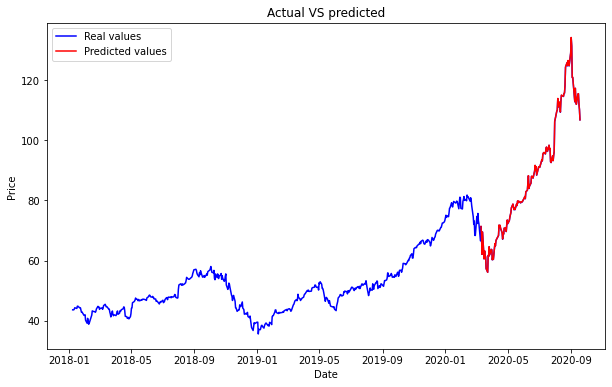

In [135]:
from utilities.visuals import plotting
plotting(recent_data['Close'], title="Actual VS predicted", y_label="Price", data2=validation_df['predictions'])
